In [2]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

# Formation energy as  chemical potential vary


 #### Total Energies in eV

In [3]:
E0=-14644858.463124419 # pristine
E1=-14711404.113635940 # addon S
E2=-14578308.639903018 # mono S vacancy
E3=-14511759.369944071 # di S vacancy up&down
E4=-14511758.944663303 # di S vacancy neighboring
E5=-14192151.211700918 # mono Mo vacancy
E_WSe2=-585793.321771426 # primtitive
ESe8=-532375.657399940   #8 atoms in unitcell
mu_Se8=ESe8/8
EW=-905397.333160509 # Total energy in eV
mu_Wbcc=EW/2



 ## $$ E^{d}_{f}=E_{defect}(n_{i}+\Delta n_{i})-E_{pristine}(n_{i}) - \sum_{i} \Delta n_{i} \mu_{i} $$
 
## $$  E^{Bulk}_{WSe_{2}}-2\mu_{Se8} \leq \mu_{W} \leq \mu^{Bulk}_{W} $$
## $$ \frac{1}{2}(E_{WSe2}-\mu^{Bulk}_{W})\leq \mu_{Se} \leq \mu_{Se8} $$


In [4]:
mu_Se0_i=0.5*(E_WSe2-mu_Wbcc)
mu_W_i=E_WSe2-2*mu_Se8
print(mu_Se0_i)
print(mu_W_i)
mu_W_f=mu_Wbcc
mu_Se0_f=mu_Se8
mu_Se0=arange(mu_Se0_i,mu_Se0_f,0.05)
mu_W0=arange(mu_W_i,mu_W_f,0.05)

-66547.32759558575
-452699.40742144105


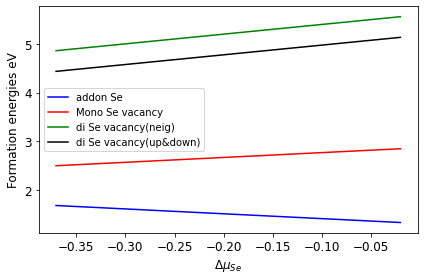

In [5]:
Ef_addSe =[] 
Ef_VSe = []
Ef_VSe2 =[]
Ef_VSe22=[]
Ef_W=[]

for i in mu_Se0:
    Ef_addSe.append(E1-E0-i) 
    Ef_VSe.append(E2-E0+i)
    Ef_VSe2.append(E3-E0+2*i) 
    Ef_VSe22.append(E4-E0+2*i)
 
for j in mu_W0:
    Ef_W.append(E5-E0+j)

plt.plot(mu_Se0-mu_Se0_f,Ef_addSe,'b', label='addon Se') 
plt.plot(mu_Se0-mu_Se0_f,Ef_VSe,'r', label='Mono Se vacancy') 
plt.plot(mu_Se0-mu_Se0_f,Ef_VSe22, 'g', label='di Se vacancy(neig)') 
plt.plot(mu_Se0-mu_Se0_f,Ef_VSe2, 'k', label='di Se vacancy(up&down)') 
#plt.plot(mu_Mo0-mu_Mo_f,Ef_Mo, 'yellow', label='Mono Mo vacancy') 
plt.xlabel(r'$\Delta \mu_{Se}$', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#

plt.savefig('Ef_muS.pdf')

plt.show()

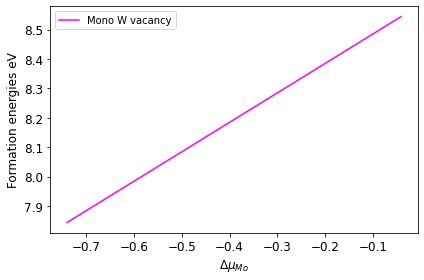

In [6]:
plt.plot(mu_W0-mu_W_f,Ef_W, 'magenta', label='Mono W vacancy') 
#plt.plot(T, VMo, 'yellow', label='Mono Mo vacany') 
plt.xlabel(r'$\Delta \mu_{Mo}$', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#
plt.savefig('Ef_muMo.pdf')
plt.show() 

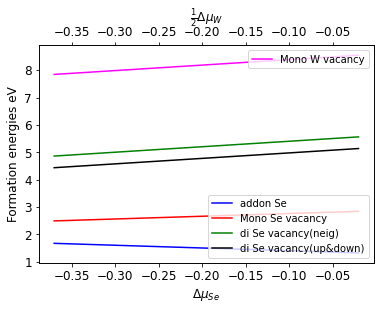

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)



ax1.plot(mu_Se0-mu_Se0_f,Ef_addSe,'b', label='addon Se') 
ax1.plot(mu_Se0-mu_Se0_f,Ef_VSe,'r', label='Mono Se vacancy') 
ax1.plot(mu_Se0-mu_Se0_f,Ef_VSe22, 'g', label='di Se vacancy(neig)') 
ax1.plot(mu_Se0-mu_Se0_f,Ef_VSe2, 'k', label='di Se vacancy(up&down)') 

ax1.set_xlabel(r'$\Delta \mu_{Se}$', fontsize=12)
ax1.set_ylabel('Formation energies eV', fontsize=12)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.19),
          fancybox=True, shadow=True, ncol=5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = ax1.twiny()
ax2.plot((mu_W0-mu_W_f)/2,Ef_W, 'magenta', label='Mono W vacancy') 
ax2.set_xlabel(r'$\frac{1}{2}\Delta \mu_{W}$', fontsize=12)

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=3, fancybox=True, shadow=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#
ax1.legend(loc=4)
ax2.legend(loc=1)

#plt.tight_layout()
plt.savefig('Ef_mu_all.png',  bbox_inches="tight",dpi=400)
plt.savefig('Ef_mu_all.pdf')
plt.show()